In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import *
%matplotlib inline

In [2]:
X = np.array([[3,4,3,2,1],
              [4,3,5,1,1],
              [3,5,3,3,3],
              [2,1,3,3,2],
              [1,1,3,2,3]
             ])

In [17]:
# centers = [[1, 1], [-1, -1]]
# X, labels_true = make_blobs(n_samples=30, centers=centers, cluster_std=0.5,random_state=0)
# fig,ax = plt.subplots(figsize=(10,5))
# ax.set_title("Actual Data showing 2 clusters")
# ax.scatter(X[:,0],X[:,1],c=labels_true,s=50,cmap = 'inferno');

In [4]:
sample_dict = dict(zip(range(X.shape[0]),np.array([X[i,:] for i in range(X.shape[0])])))
n_iters     = 300
damping     = 0.8


In [5]:
def create_similarity_matrix():
    S = np.zeros((X.shape[0],X.shape[0]))
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            S[i,j] = -1*(X[i]-X[j]).T.dot(X[i]-X[j])
    digval= S.min()
    return np.array([[digval if i==j else S[i,j] for j in range(X.shape[0]) ] for i in range(X.shape[0])])

In [6]:
def calculate_rik(a,s,k):
    s = list(s)
    a = list(a)
    sik = s[k]
    s_needed = np.array(s[:k]+s[k+1:])
    a_needed = np.array(a[:k]+a[k+1:])
    return sik-max(s_needed+a_needed)

In [7]:
def calculate_aik(r,k,i):
    rkk = r[k]
    r   = list(r)
    vec = []
    r   = np.array(r[:i]+r[i+1:])
    for n in range(len(r)):
        vec.append(max(0,r[n]))
    if k==i:
        return sum(vec)
    else:
        return min(0,rkk+sum(vec))
    
    

In [8]:
def update_R(A,S,R):
    for i in range(X.shape[0]):
        a = A[i,:]
        s = S[i,:]
        for k in range(X.shape[0]):
            R[i,k] = calculate_rik(a,s,k)
    return R

In [9]:
def update_A(R,A):
    for i in range(X.shape[0]):
        for k in range(X.shape[0]):
            r=R[:,k]
            A[i,k] = calculate_aik(r,k,i)
    return A

In [10]:
def update_lambda_a_r(R,A,R_old,A_old):
    R = damping*R_old+(1-damping)*R
    A = damping*A_old+(1-damping)*A
    return R,A

In [11]:
global A
A           = np.zeros((X.shape[0],X.shape[0]))
global R
R           = np.zeros((X.shape[0],X.shape[0]))

In [12]:
S = create_similarity_matrix()
for n in range(n_iters):
    #print(n)
    old_R = R.copy()
    old_A = A.copy()
    R     = update_R(A,S,R)
    A     = update_A(R,A)
    if n!=0:
        R,A = update_lambda_a_r(R,A,old_R,old_A)
decision_mat = A+R

In [13]:
labels_our = [np.argmax(decision_mat[i]) for i in range(decision_mat.shape[0])]


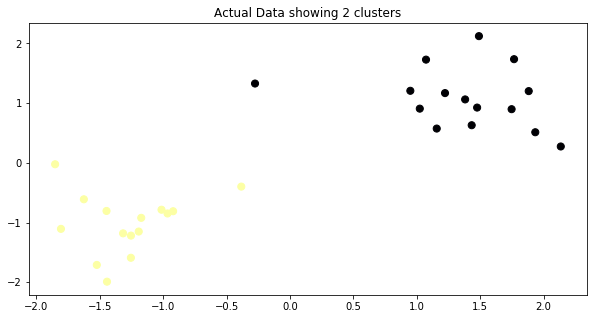

In [14]:
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("Actual Data showing 2 clusters")
ax.scatter(X[:,0],X[:,1],c=labels_our,s=50,cmap = 'inferno');

In [15]:
len(set(labels_our))

2